# SVM 모델
### (1) 코드 사용 예시
1. SVC(kernel="linear", C=1)과 같이 SVC모델을 사용할 수 있습니다. 하지만 큰 데이터에서는 속도가 느려권장하지 않습니다. 
2. SGDClassifier(loss="hinge", alpha=1/(m*c))와 같이 SGDClassifier 모델을 사용하는 것 입니다. 속도가 많이 빠르진 않지만 데이터가 크고 특성이 많아서 메모리에 적재시켜줄 수 없을 때 이용하면 좋습니다. 
3. LinearSVC(C=1 ,loss="hinge")


출처: [후니의 컴퓨터](https://hoony-gunputer.tistory.com/142)


👉 가장 기본적인 ' SVC(kernel="linear", C=1)' 형태의 코드를 사용하였음. 하지만 설명과 같이 큰 데이터에서는 추천하지 않는 방식이라고 함.   
👉 'SGDClassifier(loss="hinge", alpha=1/(m*c))' 에 대한 모델 구현 방식도 공부 필요

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno

In [3]:
df = pd.read_csv('/content/drive/MyDrive/슬기로운 건강생활/data/health_data_01.csv', encoding='utf-8')
df

,성별,나이,bmi,비만여부,혈색소,빈혈여부,식전혈당(공복혈당),당뇨여부,(혈청지오티)AST,AST구분,(혈청지오티)ALT,ALT구분,AST/ALT비율,감마 지티피,GTP/ALT비율,음주여부,간 수치
0,0,40,22.0,0,15.0,0,90.0,0,21.0,0,27.0,0,0.777778,21.0,0.777778,0.0,0
1,1,60,28.9,1,12.7,1,87.0,0,18.0,0,15.0,0,1.200000,15.0,1.000000,0.0,0
2,1,50,22.9,0,12.8,1,102.0,1,27.0,0,25.0,0,1.080000,7.0,0.280000,0.0,0
3,0,60,27.3,1,16.4,0,146.0,1,65.0,1,97.0,1,0.670103,72.0,0.742268,0.0,0
4,1,50,20.8,0,12.4,1,110.0,1,18.0,0,17.0,0,1.058824,14.0,0.823529,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987327,1,60,26.2,1,13.6,0,124.0,1,21.0,0,25.0,0,0.840000,18.0,0.720000,0.0,0
987328,1,50,21.5,0,14.0,0,98.0,0,21.0,0,14.0,0,1.500000,19.0,1.357143,1.0,0
987329,0,40,22.9,0,16.0,0,83.0,0,26.0,0,20.0,0,1.300000,17.0,0.850000,1.0,0
987330,1,40,27.3,1,11.9,1,111.0,1,25.0,0,29.0,0,0.862069,13.0,0.448276,0.0,0


In [4]:
# train_a = train.truncate(after='100',axis=0)

train = df.drop(labels=range(100000, 987332), axis=0)

train

,성별,나이,bmi,비만여부,혈색소,빈혈여부,식전혈당(공복혈당),당뇨여부,(혈청지오티)AST,AST구분,(혈청지오티)ALT,ALT구분,AST/ALT비율,감마 지티피,GTP/ALT비율,음주여부,간 수치
0,0,40,22.0,0,15.0,0,90.0,0,21.0,0,27.0,0,0.777778,21.0,0.777778,0.0,0
1,1,60,28.9,1,12.7,1,87.0,0,18.0,0,15.0,0,1.200000,15.0,1.000000,0.0,0
2,1,50,22.9,0,12.8,1,102.0,1,27.0,0,25.0,0,1.080000,7.0,0.280000,0.0,0
3,0,60,27.3,1,16.4,0,146.0,1,65.0,1,97.0,1,0.670103,72.0,0.742268,0.0,0
4,1,50,20.8,0,12.4,1,110.0,1,18.0,0,17.0,0,1.058824,14.0,0.823529,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,40,22.9,0,15.1,0,117.0,1,28.0,0,59.0,1,0.474576,119.0,2.016949,1.0,0
99996,1,40,25.4,1,13.8,0,99.0,0,56.0,1,70.0,1,0.800000,16.0,0.228571,1.0,0
99997,1,60,24.4,1,12.8,1,113.0,1,34.0,0,25.0,0,1.360000,148.0,5.920000,1.0,1
99998,1,50,21.5,0,13.7,0,108.0,1,18.0,0,17.0,0,1.058824,43.0,2.529412,1.0,1


In [5]:
# 빈혈
cond1 = (train['성별'] == '1')
cond2 = (train['혈색소'] < 12)
cond3 = (train['혈색소'] < 13)

train.loc[cond1&cond2, '빈혈여부'] = "1" # 여자 and 혈색소 < 12 : 빈혈
train.loc[~cond1&~cond2, '빈혈여부'] = "0" # 여자 and 혈색소 >= 12 : 빈혈 아님
train.loc[~cond1&cond3, '빈혈여부'] = "1" # 남자 and 혈색소 < 13 : 빈혈
train.loc[~cond1&~cond3, '빈혈여부'] = "0" # 남자 and 혈색소 >= 13 : 빈혈 아님

In [6]:
train['빈혈여부'].describe()

count     100000
unique         2
top            0
freq       80486
Name: 빈혈여부, dtype: object

In [27]:
from sklearn.svm import SVC
from sklearn import metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
# import matplotlib.pyplot as plt import numpy as np from sklearn import svm
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


In [8]:
# feature와 target 분리
yt=np.array(train['빈혈여부'])
xt=train.drop(['빈혈여부'], axis=1)
xt=np.array(xt)

In [9]:
# 정규화를 위해서는 데이터의 모든 문자를 숫자로 변환하기
scaler=MinMaxScaler()
xt=scaler.fit_transform(xt)

In [10]:
# train test 데이터 split
xtrain,xtest,ytrain,ytest=train_test_split(xt, yt, test_size=0.2, random_state=42)

## C값 검색
- C 값이 커지면 허용 오차의 개수가 작아짐   
 -> 가중치 값에 집중하는 경항 발생   
 -> margin 좁아짐


In [ ]:
#Linear SVM을 위한 적절한 C값  검색
#분류:SVC, 회귀(예측):SVR

scores = []
for thisC in [*range(1,10)]:
    svc=SVC(kernel='linear',C=thisC)
    model=svc.fit(xtrain,ytrain)
    scoreTrain=model.score(xtrain,ytrain)
    scoreTest=model.score(xtest,ytest)
    print("선형 SVM : C:{}, training score:{:2f}, test score:{:2f}".format
          (thisC,scoreTrain, scoreTest))
    scores.append([scoreTrain, scoreTest])

선형 SVM : C:1, training score:0.992175, test score:0.991850
선형 SVM : C:2, training score:0.998200, test score:0.997400
선형 SVM : C:3, training score:0.994012, test score:0.993550
선형 SVM : C:4, training score:1.000000, test score:1.000000
선형 SVM : C:5, training score:1.000000, test score:1.000000
선형 SVM : C:6, training score:1.000000, test score:1.000000
선형 SVM : C:7, training score:1.000000, test score:1.000000
선형 SVM : C:8, training score:1.000000, test score:1.000000
선형 SVM : C:9, training score:1.000000, test score:1.000000


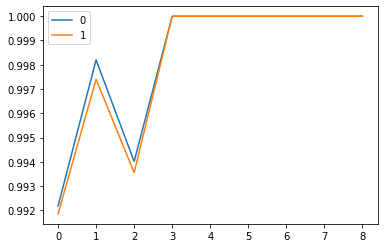

In [ ]:
# C값에 따른 train test 정확도 비교
pd.DataFrame(scores).plot()

## 모델 훈련

In [11]:
svm_model = svm.SVC(kernel='linear', C=4)
 
svm_model.fit(xtrain, ytrain) # SVM 분류 모델 훈련

SVC(C=4, kernel='linear')

In [12]:
y_pred = svm_model.predict(xtest) # 테스트

In [13]:
score = metrics.accuracy_score(y_pred,ytest)
report = metrics.classification_report(y_pred,ytest)

print(score)
print(report)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16113
           1       1.00      1.00      1.00      3887

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [14]:
print("예측된 라벨:", y_pred)
print("ground-truth 라벨:", ytest)

예측된 라벨: ['0' '0' '1' ... '1' '0' '0']
ground-truth 라벨: ['0' '0' '1' ... '1' '0' '0']


# Overfitting 확인
- 성능 평가 다양하게 진행 : [참고](https://datascience.stackexchange.com/questions/26640/how-to-check-for-overfitting-with-svm-and-iris-data)
- [SVM 과접합에 대하여](https://stats.stackexchange.com/questions/35276/svm-overfitting-curse-of-dimensionality)

### (1) raw accuracy

In [29]:
accuracy_score(y_pred, ytest)

1.0

### (2) cross_val_score
- Using the cross_val_score function, and printing the mean score and 95% confidence interval of the score estimate:

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_model, xt, yt, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.99 (+/- 0.00)


=> 교차 검증을 진행할 경우 raw accuracy보다 낮은 정확도를 보여줌   
=> overfitting 검사를 위해 KFold 검사 추천

### (3) KFold 유효성 검사
- [KFold에 대하여](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

In [15]:
print("prediction accuracy: {:.2f}".format(np.mean(y_pred == ytest))) # 예측 정확도

prediction accuracy: 1.00


In [31]:
# from sklearn.model_selection import KFold
# import numpy as np
# acc_score = []

# kf = KFold(n_splits=5)

# # for train_index, test_index in kf.split(x):

# #     xtrain, Xtest = x[train_index], X[test_index]
# #     ytrain, ytest = y[train_index], y[test_index]

# #     svm_model.fit(Xtrain,ytrain)
# #     predictions = svm_model.predict(xtest)
# #     acc_score.append(accuracy_score(predictions, ytest))

# accuracy_score(y_pred, ytest)
# acc_score.append(accuracy_score(y_pred, ytest))

# np.mean(acc_score)

1.0

## svm 시각화...
- [참고자료](https://ko.ilusionity.com/638-svm-machine-learning-tutorial-what-is-the-support-vector-machine-algorithm-explained-with-code-examples)

No handles with labels found to put in legend.


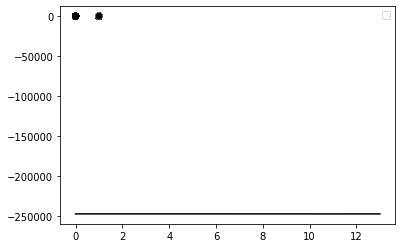

In [30]:
# # 실패

# w = svm_model.coef_[0]    # get the weight values for the linear equation from the trained SVM model
# a = -w[0] / w[1]    # get the y-offset for the linear equation 
# XX = np.linspace(0, 13)    # make the x-axis space for the data points XX
# yy = a * XX - svm_model.intercept_[0] / w[1]    # get the y-values to plot the decision boundary y 


# plt.plot(XX, yy, 'k-')    # plot the decision boundary  
# plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain)
# plt.legend()
# plt.show()    # show the plot visually 

- [방법2](https://data-gardner.tistory.com/31)

In [33]:
# !pip install mglearn

     |████████████████████████████████| 540 kB 5.9 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=2a9a0960c4a3f3575ecc4dd449d4764b30119b9b41631ded164a6d2af87a14d6
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [17]:
import mglearn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


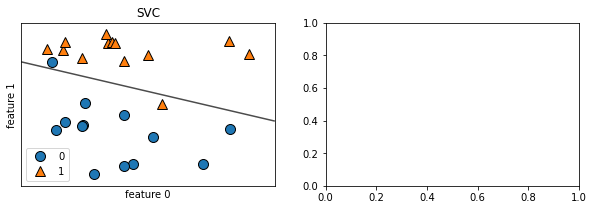

In [20]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC 
xtrain, ytrain = mglearn.datasets.make_forge() 
fig, axes = plt.subplots(1, 2, figsize=(10, 3)) 

for model, ax in zip([LinearSVC()], axes): 
  svm_model.fit(xtrain, ytrain)
  mglearn.plots.plot_2d_separator(svm_model, xtrain, fill=False, eps=0.5, ax=ax, alpha=.7) 
  mglearn.discrete_scatter(xtrain[:, 0], xtrain[:, 1], ytrain, ax=ax) 
  ax.set_title("{}".format(svm_model.__class__.__name__)) 
  ax.set_xlabel("feature 0") 
  ax.set_ylabel("feature 1") 
  
axes[0].legend()

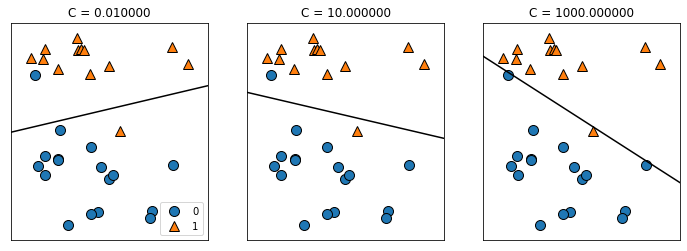

In [21]:
mglearn.plots.plot_linear_svc_regularization()

- [방법(3)](https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-7-%EC%BB%A4%EB%84%90-%EC%84%9C%ED%8F%AC%ED%8A%B8-%EB%B2%A1%ED%84%B0-%EB%A8%B8%EC%8B%A0/)

Text(0, 0.5, 'feature 1')

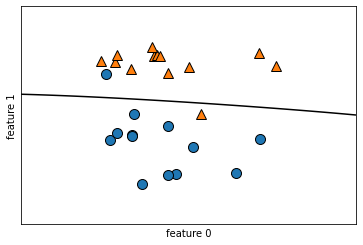

In [33]:
from sklearn.svm import LinearSVC
linear_svm = svm_model.fit(xtrain, ytrain)

mglearn.plots.plot_2d_separator(linear_svm, xtrain)
mglearn.discrete_scatter(xtrain[:, 0], xtrain[:, 1], ytrain)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

# 결과 정리
|No.|데이터 수|변동 사항|accuracy|0_precision|0_recall|1_precision|1_recall|
|---|---|---|---|---|---|---|---|
|---|---|---|---|---|---|---|---|

# Error
(1) NameError: name 'mglearn' is not defined   
=> !pip install mglearn [참고](https://m.blog.naver.com/lcj8390/221980377436)   
=> import 해줘야 함⭐

#Reference

1. https://bskyvision.com/851   
2. svm에 대한 자세한 설명 : https://bskyvision.com/163
